In [ ]:
from traitlets.config.manager import BaseJSONConfigManager
import jupyter_core
# path = "/Users/i.oseledets/anaconda2/envs/teaching/etc/jupyter/nbconfig"
cm = BaseJSONConfigManager(config_dir=path)
cm.update("livereveal", {
              "theme": "sky",
              "transition": "zoom",
              "start_slideshow_at": "selected",
               "scroll": True
})


# Лекция 2. Матричные нормы и унитарные матрицы.

## План

- Матричные и операторные нормы
- Унитарные матрицы: примеры и свойства

## Матрицы и матричные нормы

- Векторные нормы позволяли измерить размер вектора и расстояние между векторами

- Как обобщить эту концепцию на матрицы?

- Если считать матрицу вектором, элементы которого переставлены в другом порядке, то мы по аналогии с евклидовой нормой вектора получим фробениусову норму матрицы:

$$
  \Vert A \Vert_F \stackrel{\mathrm{def}}{=} \Big(\sum_{i=1}^n \sum_{j=1}^m |a_{ij}|^2\Big)^{1/2}
$$

## Матричные нормы

$\Vert \cdot \Vert$ называется матричной нормой, если это векторная норма на векторном пространстве матриц размера $n \times m$:
1. $\|A\| \geq 0$ и если $\|A\| = 0$ то $A = O$
3. $\|\alpha A\| = |\alpha| \|A\|$
4. $\|A+B\| \leq \|A\| + \|B\|$ (неравенство треугольника)

Дополнительно некоторые нормы обладают свойством субмультипликативности

* <font color='red'> $\Vert A B \Vert \leq \Vert A \Vert \Vert B \Vert$ </font>

Эти нормы также называются **субмультипликативными нормами**.

Это свойство необходимо во многих случаях, например для оценки ошибки решения линейной системы (позднее обсудим эту тему). 

Примером не субмультипликативной нормы является чебышёвская норма

$$
\|A\|_C = \displaystyle{\max_{i,j}}\, |a_{ij}|
$$

## Операторные нормы

Наиболее важным классом матричных норм являются **операторные нормы**, которые определяются следующим образом

$$
    \Vert A \Vert_{*,**} = \sup_{x \ne 0} \frac{\Vert A x \Vert_*}{\Vert x \Vert_{**}},
$$

где $\Vert \cdot \Vert_*$ и $\| \cdot \|_{**}$ **векторные нормы**.

Легко проверить, что операторные нормы являются субмультипликативными.

## Матричные $p$-нормы

Важный класс операторных норм – матричные $p$-нормы, которые определены для $\|\cdot\|_* = \|\cdot\|_{**} = \|\cdot\|_p$. <br>

Среди всех $p$-норм три нормы наиболее часто используются:  

- $p = 1, \quad \Vert A \Vert_{1} = \displaystyle{\max_j \sum_{i=1}^n} |a_{ij}|$.

- $p = 2, \quad$ спектральная норма, обозначается как $\Vert A \Vert_2$.

- $p = \infty, \quad \Vert A \Vert_{\infty} = \displaystyle{\max_i \sum_{j=1}^m} |a_{ij}|$.

Покажем справедливость выражения для $p=\infty$ на доске.

## Спектральная норма

- Спектральная норма, $\Vert A \Vert_2$, одна из наиболее часто используемых, наряду с нормой Фробениуса
- Она не может быть вычислена напрямую через элементы матрицы, но для её вычисления существуют эффективные алгоритмы
- Она напрямую связана с сингулярным разложением матрицы (SVD) поскольку выполнено следующее равенство

$$
   \Vert A \Vert_2 = \sigma_1(A) = \sqrt{\lambda_\max(A^*A)}
$$

где $\sigma_1(A)$ – максимальное сингулярное число матрицы $A$. 

- Подробнее про SVD будет рассказано далее, а сейчас давайте вычислим все вышеупомянутые нормы

In [15]:
import numpy as np
n = 100
m = 2000
a = np.random.randn(n, m) # Random n x n matrix
s1 = np.linalg.norm(a, 2) # Spectral
s2 = np.linalg.norm(a, 'fro') # Frobenius
s3 = np.linalg.norm(a, 1) # 1-norm
s4 = np.linalg.norm(a, np.inf) 
print('Spectral: {0:} \nFrobenius: {1:} \n1-norm: {2:} \ninfinity: {3:}'.format(s1, s2, s3, s4))

Spectral: 55.06036768932167 
Frobenius: 446.9316116203868 
1-norm: 102.20049588176245 
infinity: 1649.7258667392314


## Примеры

Несколько примеров задач оптимизации, в которых необходимы матричные нормы:
* <font color='red'> $\displaystyle{\min_{\mathrm{rank}(A_r)=r}}\| A - A_r\|$ </font> –– задача нахождения наилучшей малоранговой аппроксимации матрицы $A$. SVD помогает решить эту задачу для спектральной нормы $\|\cdot\|_2$ и фробениусовой нормы $\|\cdot\|_F$.


* $\displaystyle{\min_B}\| P_\Omega \odot(A - B)\| + \lambda \cdot \mathrm{rank}(B)$ –– задача заполнения матрицы (matrix completion problem). 
$$
(P_\Omega)_{ij} = \begin{cases} 1 & i,j\in\Omega \\ 0 & \text{otherwise} \end{cases}
$$
$\odot$ обозначает произведение Адамара (поэлементное)


* $\displaystyle{\min_{B\geq 0,C\geq 0}} \|A - BC\|$ –– неотрицательное матричное разложение (nonnegative matrix factorization). Запись $B\geq0$ означает, что все элементы $B$ неотрицательны.

## Скалярное произведение

Если норма помогает измерять расстояние, то **скалярное произведение** позволяет учесть угол между объектами.  

Скалярное произведение определено

* **для векторов:**
$$
   (x, y) =  x^{\top} y = \sum_{i=1}^n x_i y_i.
$$
Тогда евклидова норма записывается как
$$
   \Vert x \Vert_2 = \sqrt{(x, x)};
$$  


* **для матриц**:
$$
    (A, B)_F = \displaystyle{\sum_{i=1}^{n}\sum_{j=1}^{m}} a_{ij} b_{ij} \equiv \mathrm{trace}(A^{\top} B),
$$
где $\mathrm{trace}(A)$ обозначает след матрицы, то есть сумму диагональных элементов. 

**Упражнение:** покажите, что $\|A\|_F = \sqrt{(A, A)_F}$.

**Замечание**. Угол между векторами или матрицами определяется как

$$
   \cos \phi = \frac{(x, y)}{\Vert x \Vert_2 \Vert y \Vert_2}.
$$

## Матрицы, сохраняющие норму

- Для устойчивости вычислений необходимо, чтобы ошибка не возростала после применения некоторого преобразования. Найдём эти преобразования. 

- Пусть дан вектор $\widehat{x}$ – аппроксимация вектора $x$ такая что,  

$$
  \frac{\Vert x - \widehat{x} \Vert}{\Vert x \Vert} \leq \varepsilon.
$$

- Вычислим образ векторов $x$ и $\widehat{x}$ после применения линейного преобразования $U$:  

$$
   y = U x, \quad \widehat{y} = U \widehat{x}.
$$

- Для построения алгоритмов необходимо использовать преобразования, которые не увеличивают (или даже сохраняют) ошибку:

$$
   \frac{\Vert y - \widehat{y} \Vert}{\Vert y \Vert } = \frac{\Vert U ( x - \widehat{x}) \Vert}{\Vert U  x\Vert}  \leq \varepsilon.
$$

Вопрос состоит в том, какой класс матриц не меняет норму вектора после умножения матрицы из этого класса на вектор?

$$
\frac{\Vert U ( x - \widehat{x}) \Vert}{\Vert U  x\Vert} = \frac{ \|x - \widehat{x}\|}{\|x\|}.
$$

Для евклидовой нормы $\|\cdot\|_2$ таким свойством обладают **унитарные** (или ортогональные) матрицы.

## Унитарные (ортогональные) матрицы

Пусть $U$ комплексная $n \times n$ матрица, и $\Vert U z \Vert_2 = \Vert z \Vert_2$ для вех $z$. 

Это выполнено тогда и только тогда, когда

$$
   U^* U = I_n,
$$

где $I_n$ единичная матрица $n\times n$.

Комплексная $n\times n$ квадратная матрица называется **унитарной** если

$$
    U^*U = UU^* = I_n,
$$

что означает, что столбцы и строки матрицы образуют базис в $\mathbb{C}^{n}$.

## Свойство ортогональных матриц

Произведение двух унитарных матриц – унитарная матрица:  

$$(UV)^* UV = V^* (U^* U) V = V^* V = I,$$

- Позже мы покажем, что существуют классы унитарных матриц, произведение которых может дать произвольную унитарную матрицу 
- Эта идея лежит в основе некоторых алгоритмов, например вычисления QR разложения

## Примеры  унитарных матриц

Два важных класса унитарных матриц, произведение которых может дать любую унитарную матрицу:
1. Матрицы Хаусхолдера
2. Матрицы Гивенса

Этот факт станет очевидным после того, как мы рассмотрим QR разложение и способы его вычисления.

Другие важные примеры
* **матрица перестановки** $P$ строки (столбцы) которой получены перестановкой строк (столбцов) единичной матрицы.
* **матрица Фурье** $F_n = \frac{1}{\sqrt{n}} \left\{ e^{-i\frac{2\pi kl}{n}}\right\}_{k,l=0}^{n-1}$

## Матрица Хаусхолдера

Матрица Хаусхолдера – это матрица вида 

$$H \equiv H(v) = I - 2 vv^*,$$

где $v$ – $n \times 1$ вектор и $v^* v = 1$. Покажите, что $H$ унитарна и Эрмитова. Это также матрица отражения относительно плоскости с нормалью $v$:

$$ Hx = x - 2(v^* x) v$$

<img src="./householder.jpeg">  

## Важное свойство матрицы Хаусхолдера

Преобразование Хаусхолдера может занулить все элементы в столбце матрицы, кроме первого:

$$
    H \begin{bmatrix} \times \\ \times \\ \times \\ \times  \end{bmatrix} = 
      \begin{bmatrix} \times \\ 0 \\ 0 \\ 0  \end{bmatrix}.
$$

Доказательство на семинаре.

## Матрица Гивенса

Матрица Гивенса имеет вид

$$
    G = \begin{bmatrix}
          \cos \alpha & -\sin \alpha \\
          \sin \alpha & \cos \alpha
        \end{bmatrix},
$$

что является поворотом на угол $\alpha$ на плоскости. В общем случае, выберем две плоскости $(i, j)$ и повернём вектор $x$  

$$
x' = G x,
$$

только в $i$-ой и $j$-ой координатах:

$$
    x'_i =  x_i\cos \alpha - x_j\sin \alpha , \quad x'_j = x_i \sin \alpha  +  x_j\cos\alpha,
$$

и оставим остальные координаты $x_i$ неизменными.

Поэтому мы можем занулить элемент в позиции $j$, если выберем $\alpha$ так что
$$
     \cos \alpha = \frac{x_i}{\sqrt{x_i^2 + x_j^2}}, \quad \sin \alpha = -\frac{x_j}{\sqrt{x_i^2 + x_j^2}}
$$

(-1.0, 1.0)

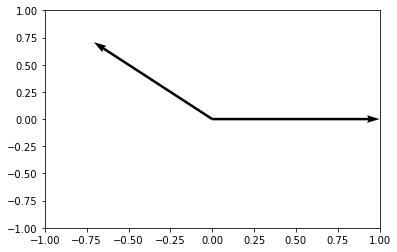

In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

alpha = -3*np.pi / 4
G = np.array([
    [np.cos(alpha), -np.sin(alpha)],
    [np.sin(alpha), np.cos(alpha)]
])
x = np.array([-1./np.sqrt(2), 1./np.sqrt(2)])
y = G.dot(x)

plt.quiver([0, 0], [0, 0], [x[0], y[0]], [x[1], y[1]], angles='xy', scale_units='xy', scale=1)
plt.xlim(-1., 1.)
plt.ylim(-1., 1.)

## Сингулярное разложение (SVD)

SVD расмотрим более подробно далее в курсе. Пока же приведём теорему о его существовании.

**Теорема.** Любая матрица $A\in \mathbb{C}^{n\times m}$ может быть записана как произведение трёх матриц:  

$$
   A = U \Sigma V^*,
$$

где 
- $U$ унитарная матрица $n \times n$
- $V$ унитарная матрица $m \times m$
- $\Sigma$ диагональная матрица с неотрицательными диагональными элементами $\sigma_1 \geq  \ldots, \geq \sigma_{\min (m,n)}$.

Более того, если $\text{rank}(A) = r$, тогда $\sigma_{r+1} = \dots = \sigma_{\min (m,n)} = 0$.

Если заменить все сингулярные числа кроме первых $r$ нулями, то результат будет наилучшим приближением ранга $r$ исходной матрицы в нормах $\|\cdot\|_2$ и $\|\cdot\|_F$. Это утверждение называется теоремой Eckart'a-Young'a и будет доказано позже в нашем курсе.

## Главное в этой лекции

- Матричные нормы: оределения и примеры
- Унитарные матрицы: примеры и свойства
- Важные частные случаи: вращения и отражения